### Методы визуализации

In [47]:
# Прочитаем таблицу №1
import pandas as pd
covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [48]:
# Прочитаем таблицу №2
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]
vaccinations_data.head()

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


    В таблице covid_data необходимо предварительно рассчитать суммарное ежедневное число заболевших во всех провинциях/штатах в каждой стране.
    В таблицах не совпадает число стран, а иногда и их названия. 
    При объединении таблиц по столбцу мы определённо теряем данные (в данной задаче потери незначительны). 
    Избежать этого можно ручными преобразованиями данных — искать различия в названиях стран в таблицах и преобразовывать их.
    Таблицы имеют разные периоды наблюдений (вакцины появились позже, чем сам вирус). Объединив данные с типом inner, мы можем потерять большое количество наблюдений в таблице covid_data.



In [49]:
# Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. 
# Тем самым переходим от данных по регионам к данным по странам

covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [50]:
# Преобразуем даты в формат datetime с помощью функции pd.to_datetime()
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [51]:
# Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных 
# случаев число смертей и число выздоровевших пациентов
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

In [52]:
# Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого 
# отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам 
# и рассчитаем разницу между «вчера и сегодня» с помощью метода diff()
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [53]:
covid_data.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [54]:
# В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [55]:
vaccinations_data.head()

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


###  Задание 3.1-3.5
    3.1. За какой период представлены данные в таблице covid_data? В качестве ответа введите даты в формате datetime (без указания времени).
    3.2 За какой период представлены данные в таблице vaccinations_data? В качестве ответа введите даты в формате datetime без указания времени.
    3.3 С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country. Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1. То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более. Результат объединения занесите в переменную covid_df. Сколько получислочь строк и столбцов в таблице covid_df?
    3.4 В получившейся в задании 3.3 таблице covid_df создайте признаки death_rate — общий процент смертей среди зафиксированных случаев (летальность) и recover_rate — общий процент случаев выздоровления. Данные характеристики рассчитайте как отношение числа смертей (deaths) и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%. Какова максимальная летальность в США (United States) за весь период?
    3.5 Чему равен средний процент выздоровевших в России (Russia)?

In [56]:
covid_df = covid_data.merge(
    vaccinations_data,
    on=['date','country'],
    how='left')
covid_df#.info()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100

In [58]:
covid_df[covid_df['country'] == 'United States']['death_rate'].max()

7.18954248366013

In [59]:
covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean()

67.06273489477654

### Базовая визуализация в Pandas: plot()

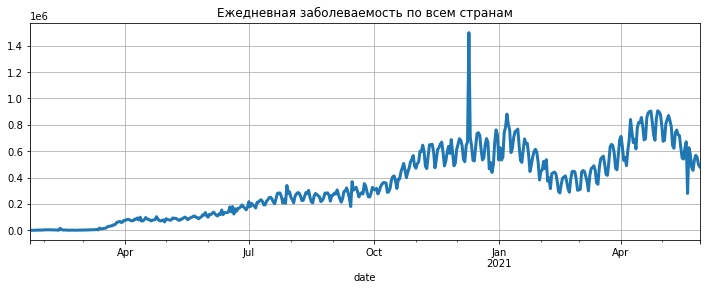

In [60]:
# отобразим, как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени. 
# Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.

# построим график с помощью метода plot(). Будем использовать линейный график размером 12x4. 
# Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость по всем странам',
    grid = True,
    lw=3);

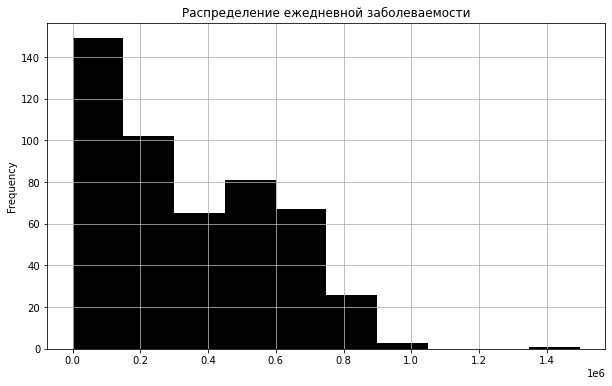

In [61]:
# построим гистограмму, которая покажет распределение ежедневной заболеваемости во всём мире. 
# Для этого параметр kind выставляем на значение 'hist'. Параметр bins (корзины) отвечает 
# за число прямоугольников в гистограмме
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10);

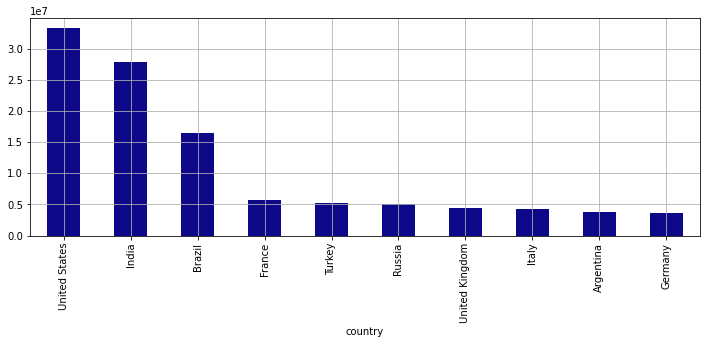

In [62]:
# построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости. 
# Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель 
# с помощью агрегирующего метода last() — он возвращает последнее значение в столбце DataFrame.
# Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. Параметр 
# colormap отвечает за цветовую гамму графика
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma');

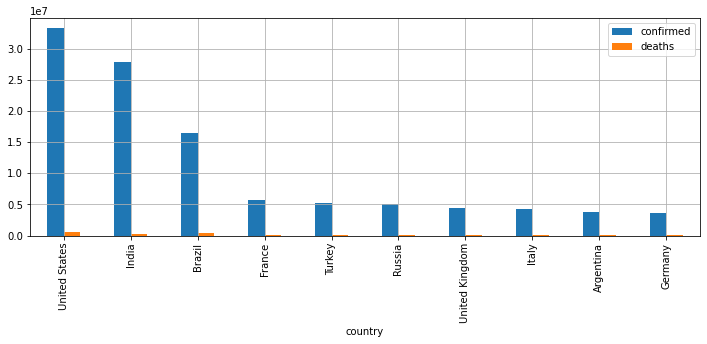

In [63]:
# посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. 
# Для этого отобразим сразу два показателя на столбчатой диаграмме


grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()

grouped_country = grouped_country.nlargest(10, columns=['confirmed'])

grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), );

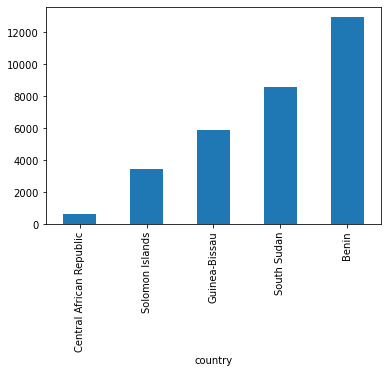

In [64]:
# построить столбчатую диаграмму для пяти стран с наименьшим общим числом вакцинаций 
# на последний день рассматриваемого периода (total_vaccinations)
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

### Библиотека Matplotlib

In [65]:
# установим библиотеку
pip install matplotlib

SyntaxError: invalid syntax (682441001.py, line 2)

In [67]:
# За визуализацию графиков в Matplotlib отвечает модуль pyplot. Традиционно он импортируется 
# под псевдонимом plt. Для более корректного отображения графиков в Jupiter используется команда %matplotlib inline.
import matplotlib.pyplot as plt
%matplotlib inline

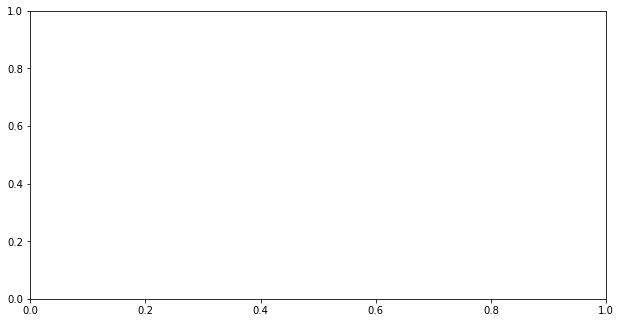

In [68]:
# сначала создаётся объект фигуры (fig) , содержащий необходимую информацию и настройки, 
# например размер в дюймах (figsize, восемь дюймов в ширину, четыре — в высоту). К этому объекту 
# с помощью метода add_axes() добавляется координатная плоскость, а на ней располагаются графические 
# объекты. Для создания координатной плоскости необходимо указать её расположение на фигуре в виде 
# списка из координат. В нашем случае она начинается в левом нижнем углу без отступов (координаты 0, 0) 
# и занимает всё отведённое место в области (100%, ширина и высота равны 1)
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

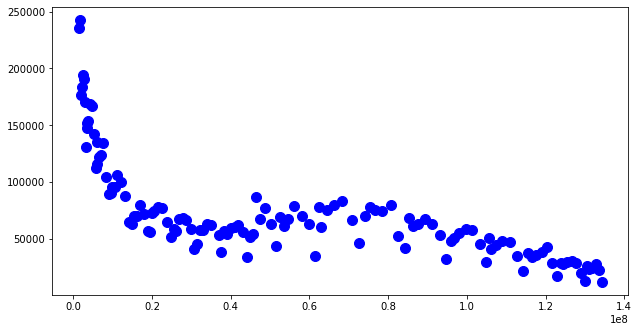

In [69]:
# построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых 
# случаев заражения (daily_confirmed) от общего количества привитых вторым компонентом вакцины 
# (people_fully_vaccinated) в США
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue');

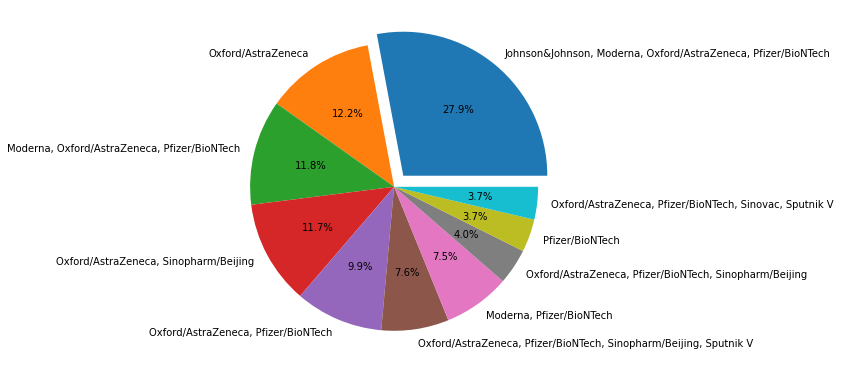

In [70]:
# Построим круговую диаграмму, чтобы отобразить ТОП-10 комбинаций вакцин в мире
# ТОП-10 комбинаций вакцин (vaccines) по распространённости мы находим с помощью метода value_counts(). 
# Круговую диаграмму строим на полученных значениях, метки для каждого значения — индексы промежуточной 
# таблицы. Будем отображать доли в процентах и округлять их до одного знака после запятой. 
# Самую распространённую вакцину сместим на 10 % от центра
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]);

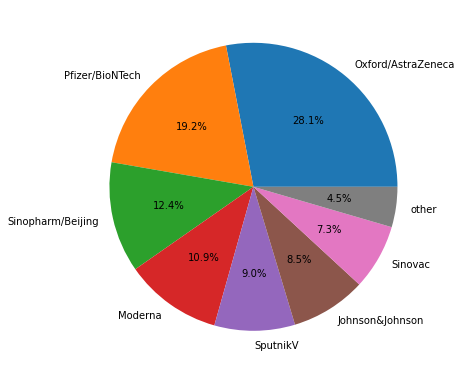

In [71]:
# Более правильным вариантом в данном случае было бы выделить каждую вакцину в отдельности 
# и посчитать, в скольки странах она используется.

#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

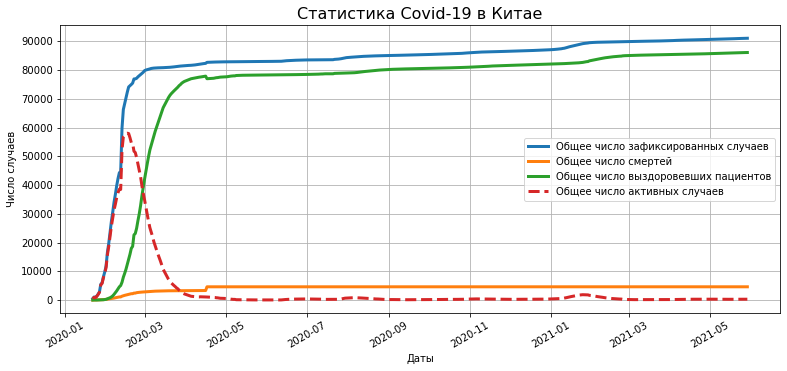

In [72]:
# изобразим на одном графике, как росла общая заболеваемость (confirmed), число зафиксированных 
# смертей (deaths), выздоровевших пациентов (recovered) и активных случаев (active) в Китае.
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

### Использование нескольких систем координат

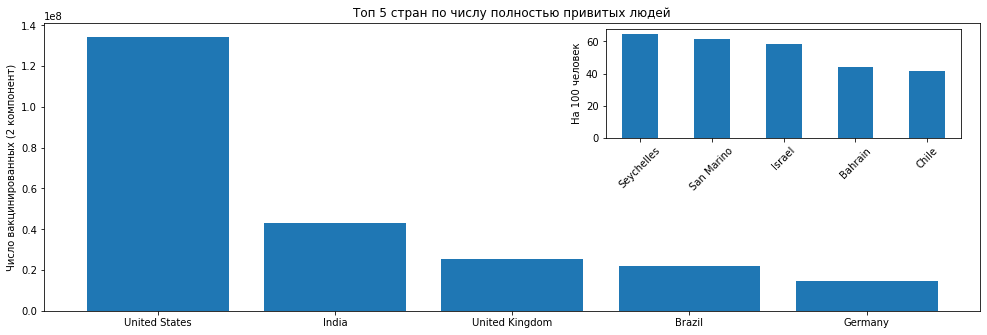

In [73]:
# отобразим ТОП-5 стран по общему числу привитых вторым компонентом людей (people_fully_vaccinated), 
# а также ТОП-5 стран по числу полностью привитых на 100 человек населения (people_fully_vaccinated_per_hundred).

# PS. Первые два числовых параметра, указанные при создании систем координат, — это отступ снизу и слева, 
# следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.

vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

### Несколько систем координат: Subplots

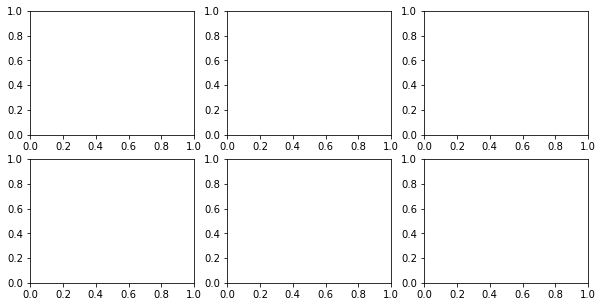

In [74]:
# следующий код создаст шесть координатных плоскостей, сведённых в таблицу размера 2x3
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

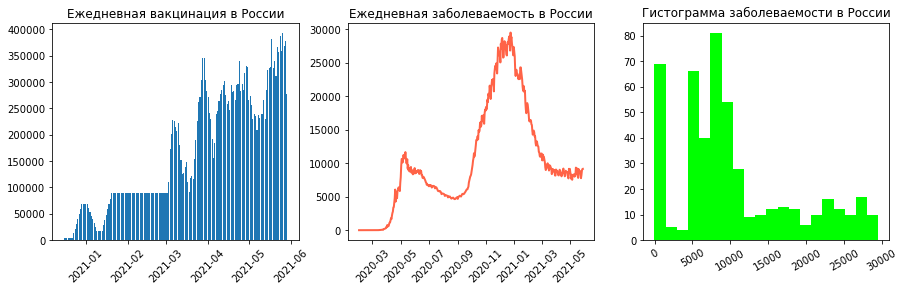

In [75]:
# построим три графика:
# 1. Столбчатую диаграмму, которая покажет динамику ежедневной вакцинации в России.
# 2. Линейный график изменения ежедневной заболеваемости в стране.
# 3. Гистограмму ежедневной заболеваемости в стране.
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

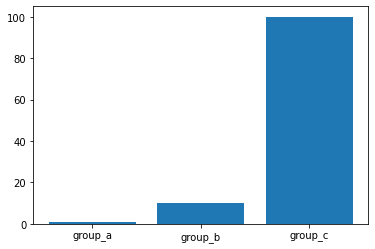

In [76]:
# Модульный подход (основан на обращении к модулю pyplot (plt) напрямую, а не средствами объектов фигур и плоскостей)
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.show()

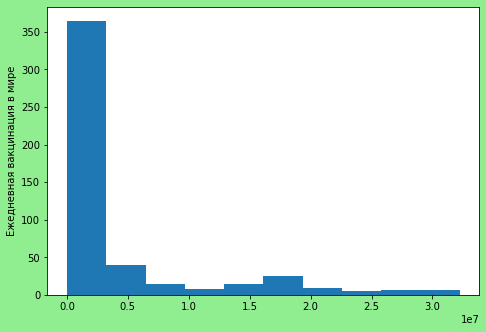

In [77]:
# раскрасим части фигуры
fig = plt.figure(facecolor='lightgreen')
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(covid_df.groupby('date')['daily_vaccinations'].sum())
axes.set_ylabel('Ежедневная вакцинация в мире');

### Библиотека Seaborn

In [78]:
# установка библиотеки
pip install seaborn

SyntaxError: invalid syntax (4259629754.py, line 2)

In [79]:
import seaborn as sns
print(sns.__version__)

0.11.2


In [80]:
# сравнивать несколько стран: Россию, Австралию, Германию, Канаду и Великобританию. Создадим специальный 
# DataFrame croped_covid_df для этих данных. Для фильтрации по списку значений используем метод isin(), 
# который проверяет, есть ли запись в столбце в переданном в метод списке. 
# Чтобы показатели по странам стали сопоставимыми: добавим информацию о населении стран, чтобы рассчитать 
# ежедневную заболеваемость на 100 человек — заболеваемость в процентах от общего количества населения 
# (daily_confirmed_per_hundred).
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


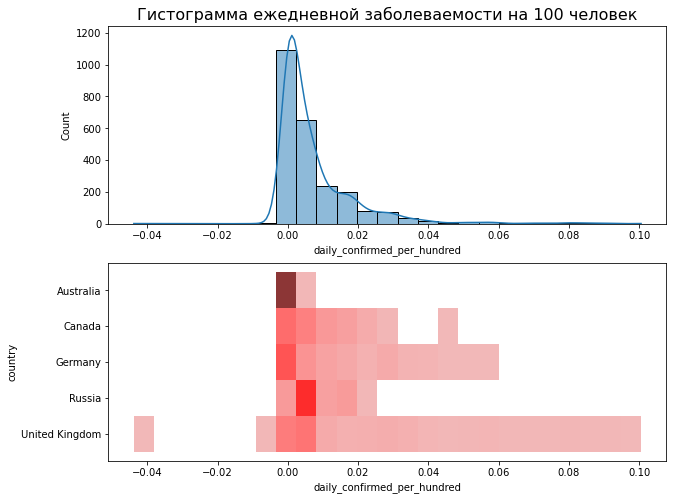

In [81]:
# Построим сразу две гистограммы: одна будет иллюстрировать общее распределение ежедневной 
# заболеваемости (daily_confirmed), а вторая — то же распределение в разрезе стран. 
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]);

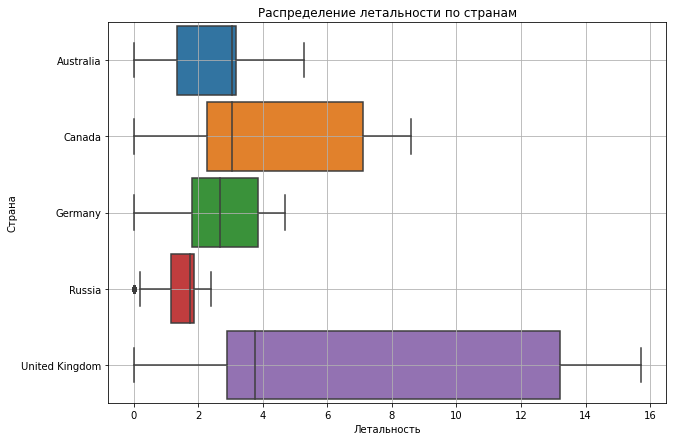

In [82]:
# Коробчатые диаграммы в Seaborn строятся с помощью метода boxplot()
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

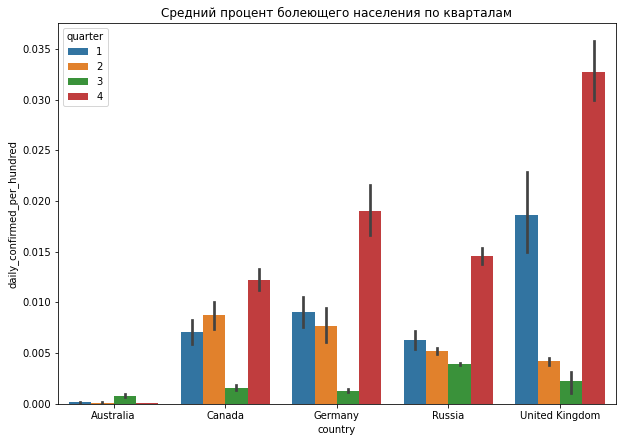

In [84]:
# Для построения столбчатых диаграмм в Seaborn используется метод barplot(). По умолчанию 
# метод отображает среднее по столбцу, который указан в параметре x (вместо среднего можно вычислить 
# и любую другую статистическую характеристику, наименование которой задаётся в параметре estimator). 
# Для добавления многоуровневости используется параметр hue, который позволяет группировать данные по признаку
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

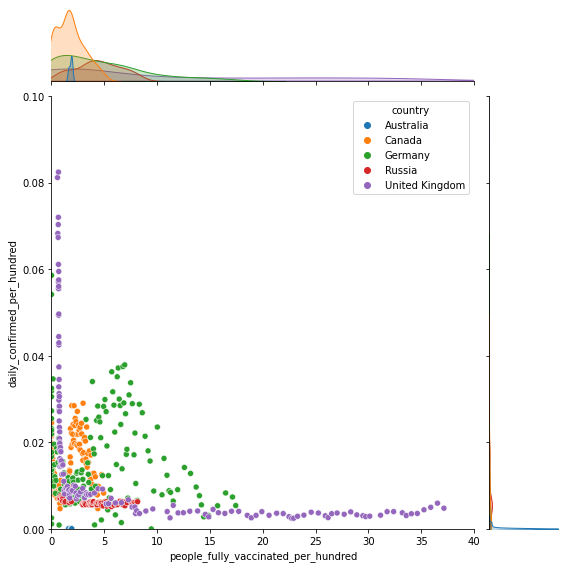

In [85]:
# Построим jointplot() — в котором совмещены диаграмма рассеяния и гистограмма
# Построим jointplot зависимости ежедневной заболеваемости в странах от общей численности населения 
# в процентах (daily_confirmed_per_hundred) от числа полностью вакцинированных в процентах 
# (people_fully_vaccinated_per_hundred)
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,)

In [86]:
# сравним темпы вакцинации по странам во времени с помощью тепловой карты
# Предварительно создадим сводную таблицу: по столбцам отложим признак даты, а по строкам — страны. 
# В ячейках таблицы будет находиться процент вакцинированных (первым компонентом) людей в стране 
# на определённую дату. Чтобы даты отображались на тепловой карте верно, их необходимо привести к типу string
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


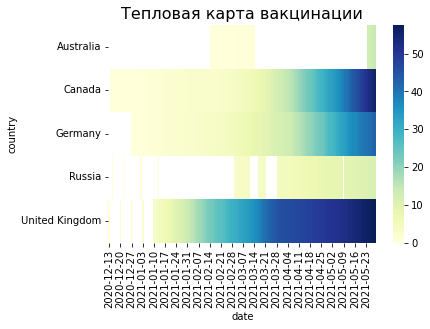

In [87]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);